<a href="https://colab.research.google.com/github/saadmarwan16/Tensorflow/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-07-02 08:08:38--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-07-02 08:08:38 (9.78 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [4]:
data = pd.read_csv('moore.csv', header=None).values
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

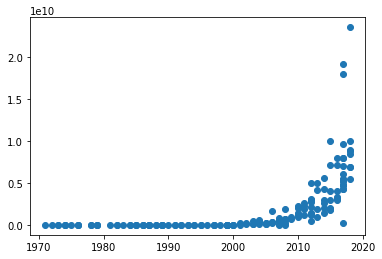

In [5]:
plt.scatter(X, Y);

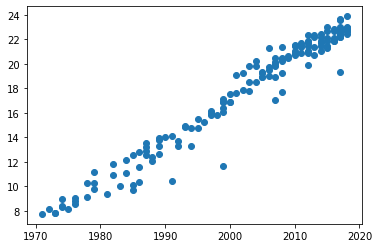

In [6]:
Y = np.log(Y)
plt.scatter(X, Y);

In [7]:
X = X - X.mean()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1, ),),
    tf.keras.layers.Dense(1,),
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9,),
    loss='mse',
)

def schedule(epoch, lr):
    if epoch >= 50:
        return 0.0001

    return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 2ms/step - loss: 386.8144
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 412.0818
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 610.1260
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 412.0180
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 315.4294
Epoch 6/200
6/6 [==============================] - 0s 4ms/step - loss: 127.2941
Epoch 7/200
6/6 [==============================] - 0s 3ms/step - loss: 93.3817
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 80.2334
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 54.2543
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 35.1343
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 25.6384
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 24.4914
Epoch 13/200
6/6 [=========================

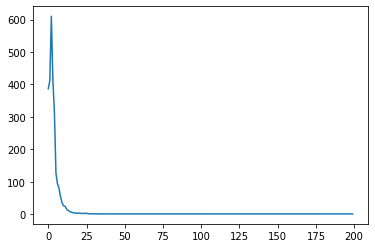

In [9]:
plt.plot(r.history['loss'], label='loss');

In [10]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.35373735]], dtype=float32), array([17.76387], dtype=float32)]


In [11]:
a = model.layers[0].get_weights()[0][0, 0]

In [12]:
print(f'Time to double: {np.log(2) / a}')

Time to double: 1.9594967061751107


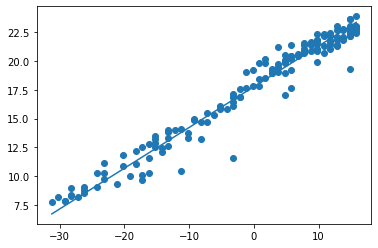

In [13]:
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat);

In [17]:
w, b = model.layers[0].get_weights()

X = X.reshape(-1, 1)

Yhat2 = (X.dot(w) + b).flatten()

np.allclose(Yhat, Yhat2)

True